In [75]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [159]:
pca = PCA(n_components=3)
xt = pca.fit_transform(X)
pca.explained_variance_

array([25.81359415,  6.461938  ,  3.4121454 ])

In [3]:
df = pd.read_csv('../data/kandidater_data.csv').dropna()

In [4]:
df

,ID,Firstname,LastName,Gender,Birthdate,CurrentPartyCode,Profession,Education,1,2,...,16,17,18,19,20,21,22,23,24,25
0,391,Anne Valentina,Berthelsen,F,1994-09-16,F,Folketingsmedlem,Bachelor-/diplomuddannelse,2.0,2.0,...,2.0,-1.0,1.0,1.0,-1.0,-2.0,2.0,2.0,1.0,2.0
1,756,Mattias,Tesfaye,M,1981-03-31,A,Minister,Erhvervsuddannelse,1.0,1.0,...,-2.0,1.0,-1.0,1.0,2.0,-2.0,1.0,1.0,1.0,1.0
2,235,Kashif,Ahmad,M,1980-06-01,B,Ikke oplyst,Ikke oplyst,1.0,-1.0,...,1.0,-2.0,1.0,-2.0,-2.0,1.0,2.0,2.0,2.0,2.0
3,931,Ester,Esmarch,F,1974-12-31,K,Offentligt ansat,Bachelor-/diplomuddannelse,1.0,1.0,...,-1.0,-2.0,-1.0,1.0,-2.0,1.0,1.0,1.0,-1.0,1.0
5,386,Peter,Westermann,M,1985-06-01,F,Byråds- eller regionsrådsmedlem,Kandidat-/masteruddannelse,1.0,1.0,...,1.0,-1.0,1.0,1.0,-2.0,-2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,203,Andreas,Steenberg,M,1983-07-22,B,Folketingsmedlem,Kandidat-/masteruddannelse,1.0,-2.0,...,1.0,-2.0,1.0,-1.0,-2.0,-1.0,-1.0,1.0,1.0,-1.0
988,934,Jonas Røjkjær,Laustsen,M,2000-12-25,K,Studerende,Gymnasial uddannelse,-1.0,-1.0,...,-2.0,-2.0,1.0,-1.0,-2.0,1.0,1.0,1.0,1.0,2.0
990,118,Tobias,Bennedsen,M,1986-04-14,C,Offentligt ansat,Bachelor-/diplomuddannelse,-2.0,-2.0,...,-2.0,-1.0,-1.0,-1.0,2.0,2.0,1.0,1.0,1.0,-2.0
993,294,Sandra Elisabeth,Skalvig,F,1990-10-09,I,Offentligt ansat,Bachelor-/diplomuddannelse,-1.0,-2.0,...,-2.0,-1.0,-2.0,-2.0,2.0,2.0,-1.0,-1.0,1.0,-1.0


In [5]:
X = df[[str(i) for i in range(1, 26)]]
labels = df.CurrentPartyCode

In [6]:
colormap = {'A': '#A82721', 
            'O': '#EAC73E', 
            'V': '#254264', 
            'Ø': '#E6801A', 
            'I': '#3FB2BE', 
            'Å': '#2B8738', 
            'B': '#733280', 
            'F': '#E07EA8', 
            'C': '#96B226', 
            'D': '#127B7F', 
            'K': '#8B8474', 
            'Q': '#C49414', 
            'M': '#832B93', 
            'Æ': w'#2C5877'}

In [7]:
c = labels.map(colormap)

In [8]:
c

0      #E07EA8
1      #A82721
2      #733280
3      #8B8474
5      #E07EA8
        ...   
987    #733280
988    #8B8474
990    #96B226
993    #3FB2BE
995    #733280
Name: CurrentPartyCode, Length: 792, dtype: object

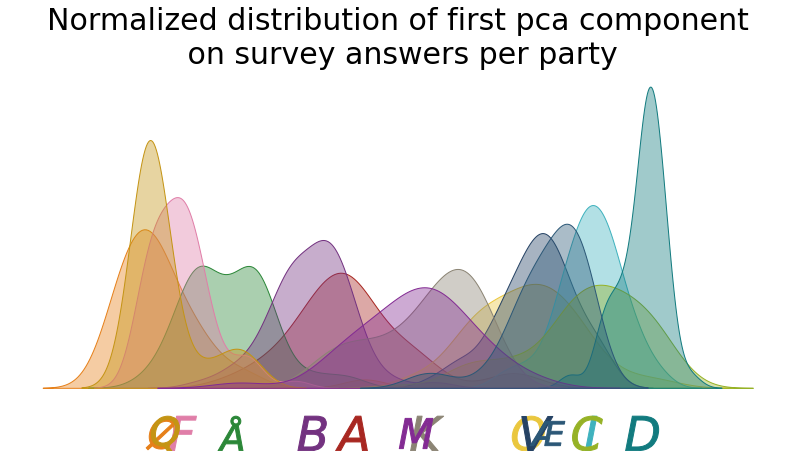

In [142]:
# apply pca
pca = PCA(n_components=1)
xt = pca.fit_transform(X)

# plot figure
fig, ax = plt.subplots(figsize=(14,7))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
#ax.set_ylim(0,3.2)

ax.set_title('Normalized distribution of first pca component\n on survey answers per party', 
             fontdict={'fontsize': 30})

y = np.random.uniform(.6, 3, df.shape[0])

for key, val in colormap.items():
    mask = df.CurrentPartyCode == key
    party_mean = np.mean(xt[mask])
    # ax.hist(xt[mask,0], color=val, density=True, alpha=.4, bins=30)
    sns.kdeplot(-xt[mask,0], color=val, alpha=.4, fill=True, ax=ax)
    ax.scatter([-party_mean], [-.1], color=val, alpha=1, s=1200, marker=f'${key}$')
    # ax.scatter(xt[mask,0], y[mask], color=val, alpha=.2, s=100, label=key)
# ax.legend(ncol=7)

In [143]:
fig.savefig('../figs/pca_dist.svg')

In [114]:
# apply pca
pca = PCA(n_components=1)
xt = pca.fit_transform(X)
df['pca'] = xt

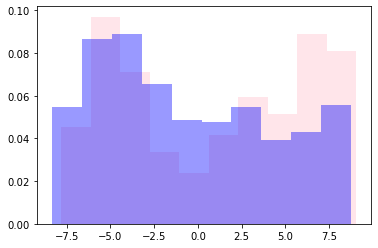

In [117]:
fig, ax = plt.subplots()
gender = ['F', 'M']
gender_map = {'F': 'pink', 'M': 'blue'}
for g in gender:
    mask = df.Gender == g
    ax.hist(df[mask].pca, color=gender_map[g], density=True, alpha=.4)

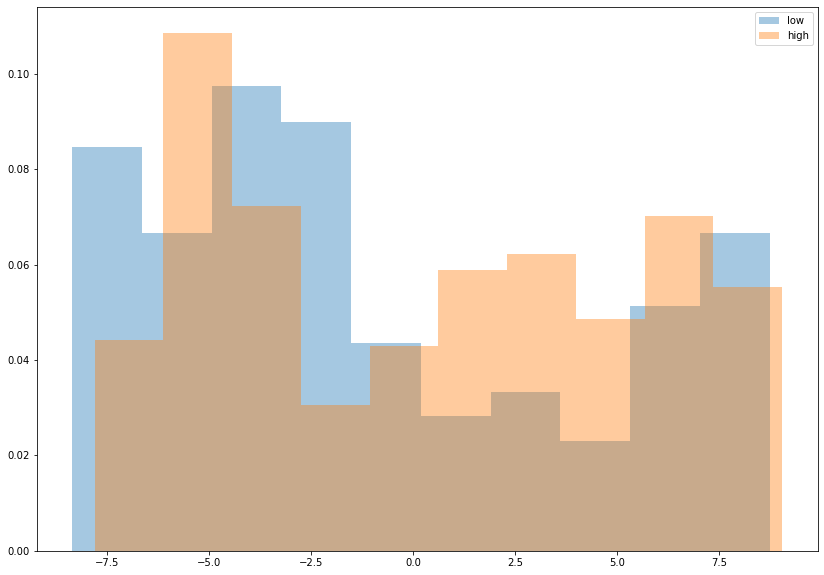

In [131]:
fig, ax = plt.subplots(figsize=(14,10))
edumap = {
    'Bachelor-/diplomuddannelse': 'high',
    'Erhvervsuddannelse': 'low',
    'Kandidat-/masteruddannelse': 'high',
    'Ph.d.-uddannelse': 'high',
    'Gymnasial uddannelse': 'low',
    '10. klasse': 'low',
    'Seminaruddannelse': 'low',
    'Grundskole': 'low'
         }
df['education_level'] = df.Education.map(edumap)

for education in ['low', 'high']:
    mask = df.education_level == education
    ax.hist(df[mask].pca, density=True, label=education, alpha=.4)
ax.legend()

In [135]:
df

,ID,Firstname,LastName,Gender,Birthdate,CurrentPartyCode,Profession,Education,1,2,...,18,19,20,21,22,23,24,25,pca,education_level
0,391,Anne Valentina,Berthelsen,F,1994-09-16,F,Folketingsmedlem,Bachelor-/diplomuddannelse,2.0,2.0,...,1.0,1.0,-1.0,-2.0,2.0,2.0,1.0,2.0,6.797099,high
1,756,Mattias,Tesfaye,M,1981-03-31,A,Minister,Erhvervsuddannelse,1.0,1.0,...,-1.0,1.0,2.0,-2.0,1.0,1.0,1.0,1.0,-0.276567,low
2,235,Kashif,Ahmad,M,1980-06-01,B,Ikke oplyst,Ikke oplyst,1.0,-1.0,...,1.0,-2.0,-2.0,1.0,2.0,2.0,2.0,2.0,3.724530,NaN
3,931,Ester,Esmarch,F,1974-12-31,K,Offentligt ansat,Bachelor-/diplomuddannelse,1.0,1.0,...,-1.0,1.0,-2.0,1.0,1.0,1.0,-1.0,1.0,0.715247,high
5,386,Peter,Westermann,M,1985-06-01,F,Byråds- eller regionsrådsmedlem,Kandidat-/masteruddannelse,1.0,1.0,...,1.0,1.0,-2.0,-2.0,2.0,2.0,2.0,1.0,5.909887,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,203,Andreas,Steenberg,M,1983-07-22,B,Folketingsmedlem,Kandidat-/masteruddannelse,1.0,-2.0,...,1.0,-1.0,-2.0,-1.0,-1.0,1.0,1.0,-1.0,1.908921,high
988,934,Jonas Røjkjær,Laustsen,M,2000-12-25,K,Studerende,Gymnasial uddannelse,-1.0,-1.0,...,1.0,-1.0,-2.0,1.0,1.0,1.0,1.0,2.0,-2.502447,low
990,118,Tobias,Bennedsen,M,1986-04-14,C,Offentligt ansat,Bachelor-/diplomuddannelse,-2.0,-2.0,...,-1.0,-1.0,2.0,2.0,1.0,1.0,1.0,-2.0,-6.791456,high
993,294,Sandra Elisabeth,Skalvig,F,1990-10-09,I,Offentligt ansat,Bachelor-/diplomuddannelse,-1.0,-2.0,...,-2.0,-2.0,2.0,2.0,-1.0,-1.0,1.0,-1.0,-6.747310,high


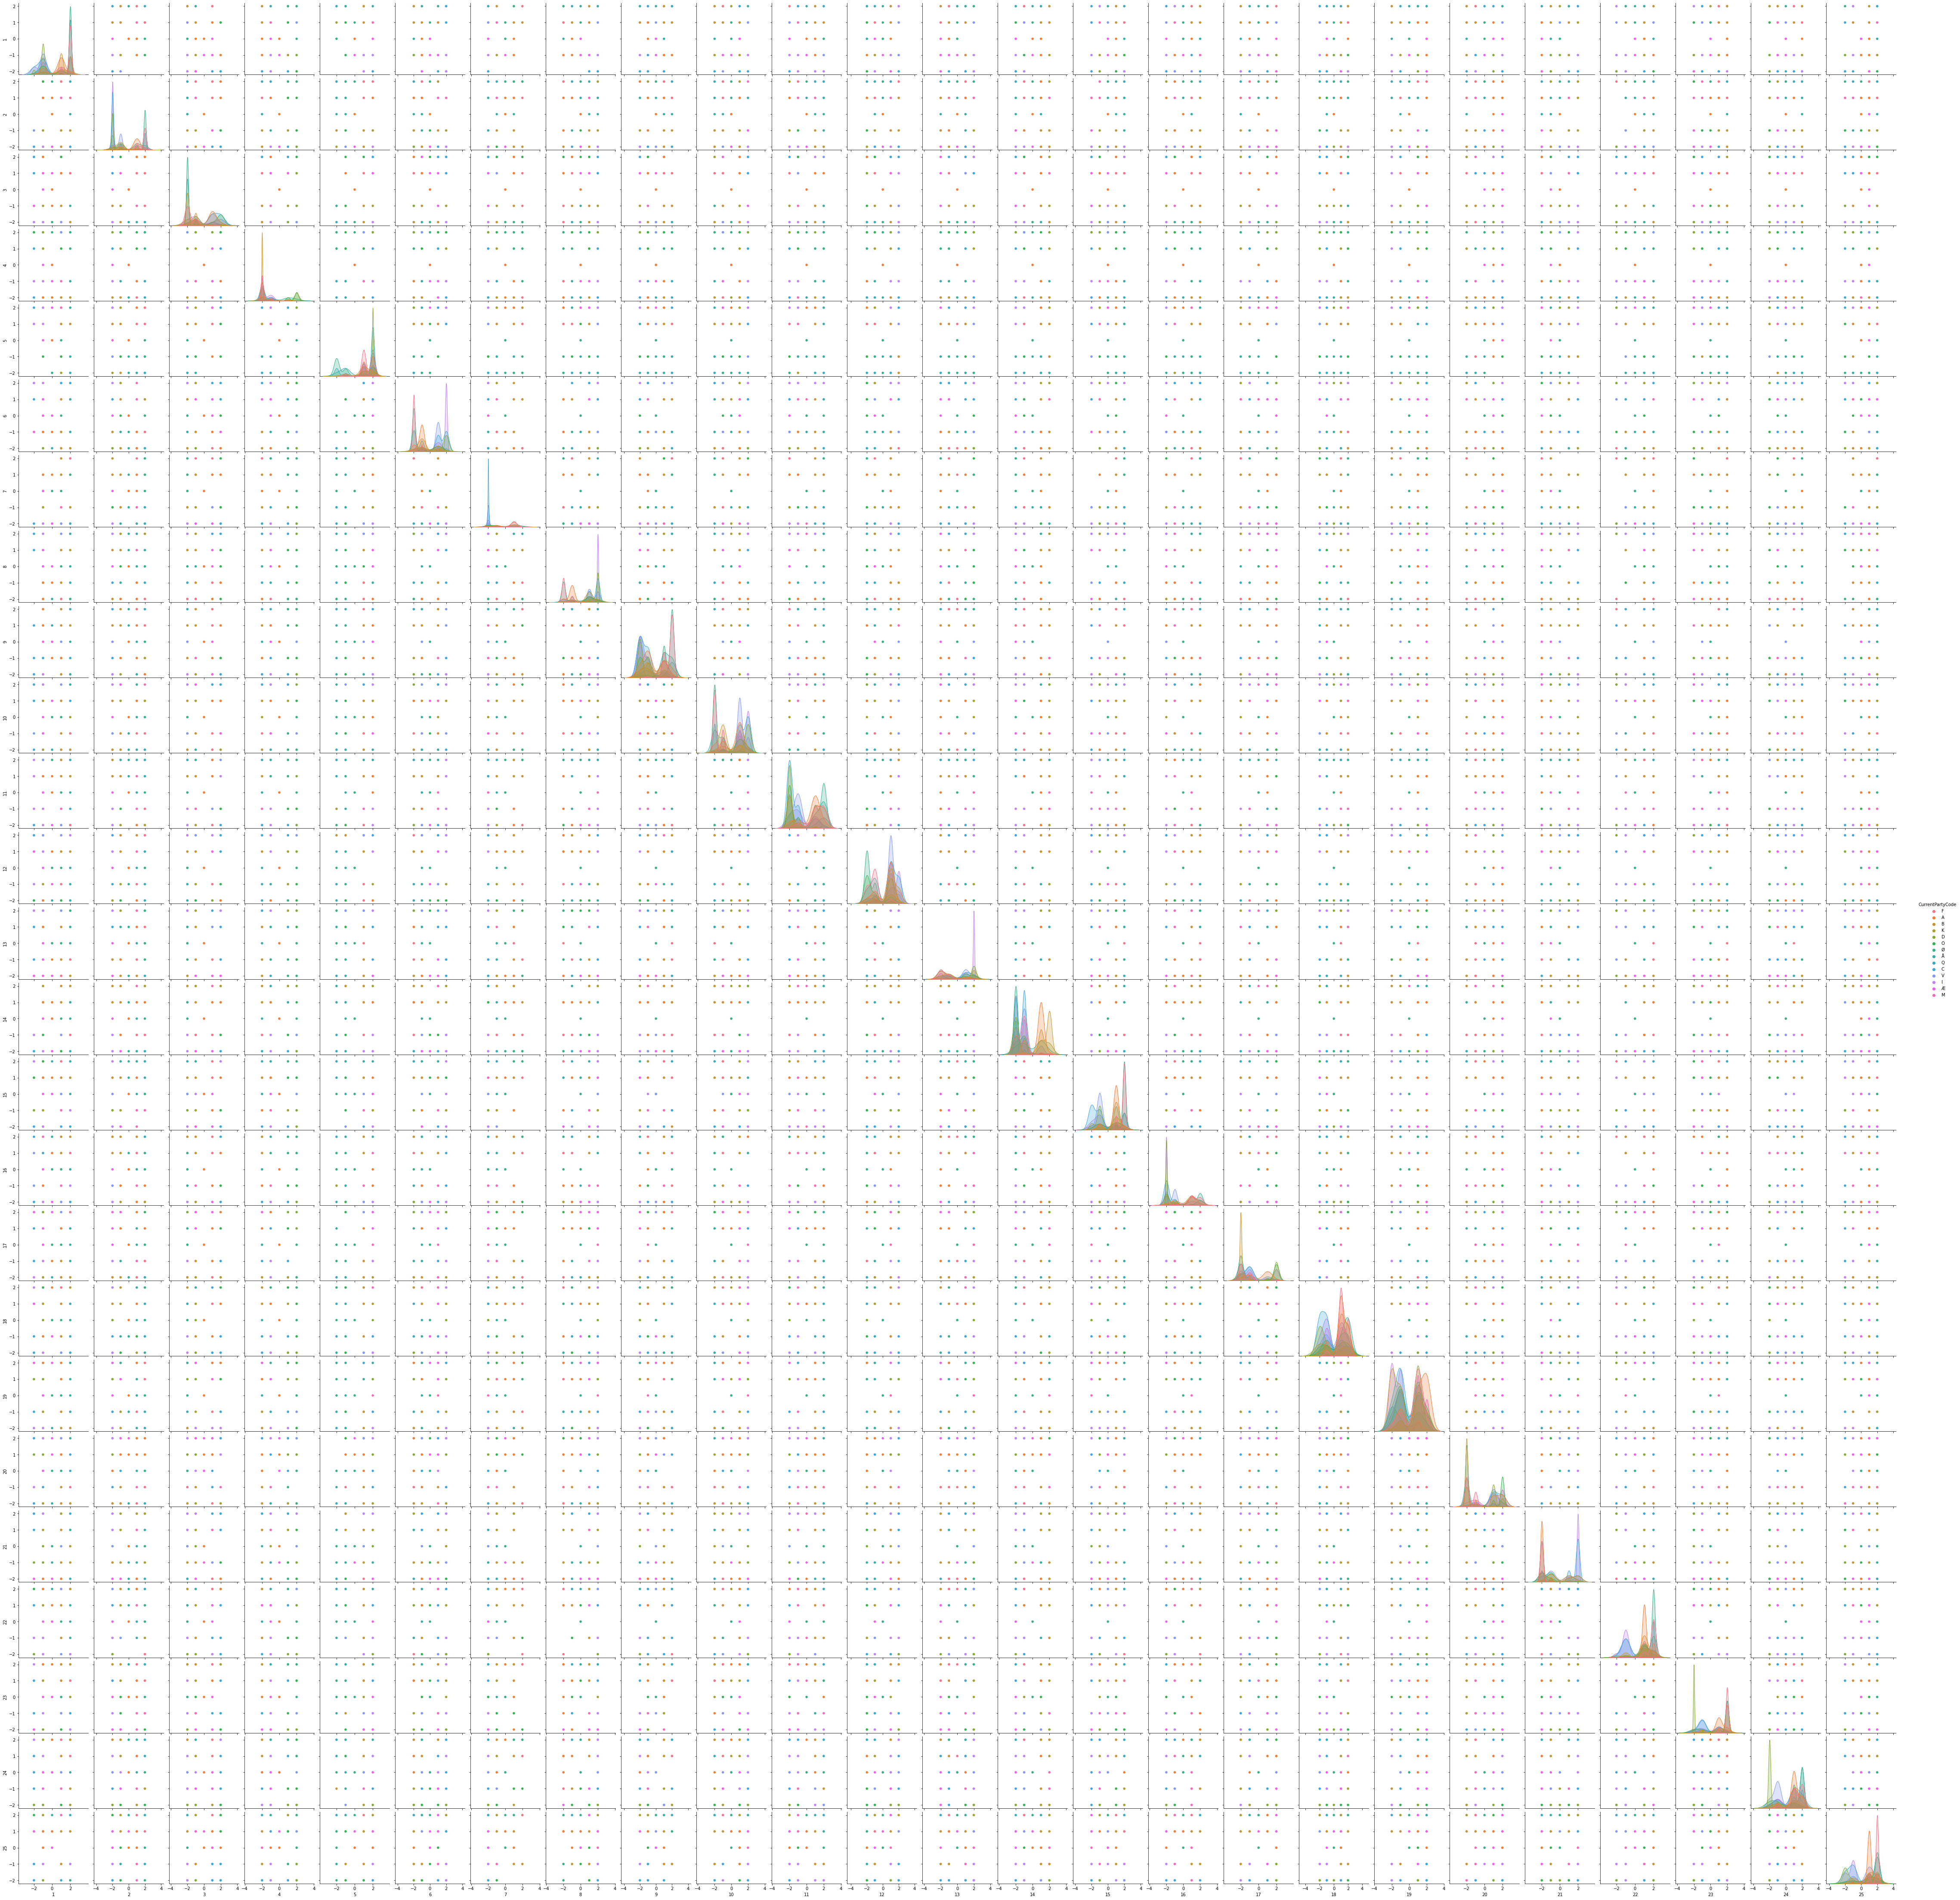

In [138]:
sns.pairplot(df, hue='CurrentPartyCode', vars=[str(i) for i in range(1, 26)])